In [1]:
import time
import numpy as np
import yaml
import torch
torch.cuda.is_available()
from tqdm import tqdm
from utils.parse import parse_args, load_model, get_clusters, get_pca, get_tsne,get_hier_clusters
from dataset.dataloader import data_loader
import itertools
import matplotlib.pyplot as plt

In [2]:
config = yaml.load(open("config/config_cal_dbcv.yaml"),Loader=yaml.FullLoader)
test_data_loader = data_loader(config)
with torch.cuda.device(config['util']['gpu']):
    ema_net = load_model(config)
    all_points = []
    start = time.time()
    for batch_id, test_data in tqdm(enumerate(test_data_loader, 0), total=len(test_data_loader), smoothing=0.9,desc = 'test dataset'):
        x1_test = test_data[0]
        x1_test = x1_test.cuda()
        x1_test = x1_test.transpose(2, 1)
        emb =  ema_net(x1_test,return_embedding=config['training']['return_embedding'])
        all_points.append(emb[0].detach().cpu().numpy())
    del ema_net
    del test_data_loader
    all_points = np.concatenate(all_points,axis=0)
    end = time.time()
    np.random.seed(42)

Successfully load Abc with 49981 instances


test dataset: 100%|██████████| 391/391 [00:19<00:00, 20.35it/s]


## 1000 Datapoints

In [6]:
num_points = 1000
red_all_points = np.take(all_points, np.random.choice(np.array(list(range(0,all_points.shape[0]))), num_points, replace=False), axis=0, out=None, mode='raise')
    
print(f'Dimension of dataset {red_all_points.shape} and it takes {end-start} seconds or {(end-start)/60} minutes or {(end-start)/3600} hours')
red_all_points = get_pca(n_components=config['pca']['n_components'],data=red_all_points)
    
# red_all_points = get_pca(n_components=config['pca_2']['n_components'],data=red_all_points)

red_all_points = get_tsne(n_components=config['tsne']['n_components'], data=red_all_points)

Dimension of dataset (1000, 1024) and it takes 22.655192852020264 seconds or 0.37758654753367105 minutes or 0.006293109125561185 hours
Dimesnion after PCA (1000, 512) and it takes 1.9333696365356445 seconds or 0.03222282727559408 minutes or 0.0005370471212599012 hours
Dimesnion after TSNE (1000, 2) and it takes 2.753288745880127 seconds or 0.045888145764668785 minutes or 0.0007648024294111464 hours


In [9]:
classifiers = ['hdbscan', 'kmeans', 'spectral', 'agglomerative']
n_clusters = [10, 25, 50, 100, 175]
params = list(itertools.product(classifiers,n_clusters))
# classifiers = ['hdbscan', 'agglomerative', 'kmeans']
# n_clusters = [10, 25, 50, 100, 175]
# params = list(itertools.product(classifiers,n_clusters))
params

[('hdbscan', 10),
 ('hdbscan', 25),
 ('hdbscan', 50),
 ('hdbscan', 100),
 ('hdbscan', 175),
 ('kmeans', 10),
 ('kmeans', 25),
 ('kmeans', 50),
 ('kmeans', 100),
 ('kmeans', 175),
 ('spectral', 10),
 ('spectral', 25),
 ('spectral', 50),
 ('spectral', 100),
 ('spectral', 175),
 ('agglomerative', 10),
 ('agglomerative', 25),
 ('agglomerative', 50),
 ('agglomerative', 100),
 ('agglomerative', 175)]

hdbscan Clustering
The value of min_cluster_size is 2
Number of outliers 104
Number of clusters excluding outliers 305
Clustering validation dataset took 0.14809870719909668 seconds
(305, 2)


100%|██████████| 305/305 [00:00<00:00, 22571.91it/s]

Dimension of embedding of all representative  objects (305, 2)
The total number of clusters are 306
 Number if points to be clustered are 305
hdbscan Clustering


The value of min_cluster_size is 2
Number of outliers 31
Number of clusters excluding outliers 79
Clustering validation dataset took 0.0532689094543457 seconds
(79, 2)
Now number of clusters are 111
The number are outliers in level 1 are 104


100%|██████████| 79/79 [00:00<00:00, 24966.10it/s]


Dimension of embedding of all representative  objects (79, 2)
Dimension of embedding of all representative  objects including outliers (110, 2)
The total number of clusters are 111
 Number if points to be clustered are 110
hdbscan Clustering
The value of min_cluster_size is 2
Number of outliers 21
Number of clusters excluding outliers 29
Clustering validation dataset took 0.03516221046447754 seconds
(29, 2)
Now number of clusters are 51
The number are outliers in level 2 are 104


100%|██████████| 29/29 [00:00<00:00, 25043.20it/s]


Dimension of embedding of all representative  objects (29, 2)
Dimension of embedding of all representative  objects including outliers (50, 2)
The total number of clusters are 51
 Number if points to be clustered are 50
hdbscan Clustering
The value of min_cluster_size is 2
Number of outliers 5
Number of clusters excluding outliers 13
Clustering validation dataset took 0.028575897216796875 seconds
(13, 2)
Now number of clusters are 19
The number are outliers in level 3 are 104


100%|██████████| 13/13 [00:00<00:00, 49977.96it/s]

Dimension of embedding of all representative  objects (13, 2)
Dimension of embedding of all representative  objects including outliers (18, 2)
The total number of clusters are 19
 Number if points to be clustered are 18
hdbscan Clustering
The value of min_cluster_size is 2
Number of outliers 2
Number of clusters excluding outliers 5
Clustering validation dataset took 0.025300264358520508 seconds
(5, 2)


Now number of clusters are 8
The number are outliers in level 4 are 104


100%|██████████| 5/5 [00:00<00:00, 33026.02it/s]


Dimension of embedding of all representative  objects (5, 2)
Dimension of embedding of all representative  objects including outliers (7, 2)
The total number of clusters are 8
Ultimately unique labels are 8
hdbscan Clustering
The value of min_cluster_size is 2
Number of outliers 104
Number of clusters excluding outliers 305
Clustering validation dataset took 0.11690616607666016 seconds
(305, 2)


100%|██████████| 305/305 [00:00<00:00, 21455.86it/s]

Dimension of embedding of all representative  objects (305, 2)
The total number of clusters are 306
 Number if points to be clustered are 305
hdbscan Clustering


The value of min_cluster_size is 2
Number of outliers 31
Number of clusters excluding outliers 79
Clustering validation dataset took 0.06439828872680664 seconds
(79, 2)
Now number of clusters are 111
The number are outliers in level 1 are 104


100%|██████████| 79/79 [00:00<00:00, 25976.01it/s]


Dimension of embedding of all representative  objects (79, 2)
Dimension of embedding of all representative  objects including outliers (110, 2)
The total number of clusters are 111
 Number if points to be clustered are 110
hdbscan Clustering
The value of min_cluster_size is 2
Number of outliers 21
Number of clusters excluding outliers 29
Clustering validation dataset took 0.03355240821838379 seconds
(29, 2)
Now number of clusters are 51
The number are outliers in level 2 are 104


100%|██████████| 29/29 [00:00<00:00, 60696.02it/s]


Dimension of embedding of all representative  objects (29, 2)
Dimension of embedding of all representative  objects including outliers (50, 2)
The total number of clusters are 51
 Number if points to be clustered are 50
hdbscan Clustering
The value of min_cluster_size is 2
Number of outliers 5
Number of clusters excluding outliers 13
Clustering validation dataset took 0.027814865112304688 seconds
(13, 2)
Now number of clusters are 19
The number are outliers in level 3 are 104


100%|██████████| 13/13 [00:00<00:00, 51391.10it/s]

Dimension of embedding of all representative  objects (13, 2)
Dimension of embedding of all representative  objects including outliers (18, 2)
The total number of clusters are 19
Ultimately unique labels are 19
hdbscan Clustering


The value of min_cluster_size is 2
Number of outliers 104
Number of clusters excluding outliers 305
Clustering validation dataset took 0.1122279167175293 seconds
(305, 2)


100%|██████████| 305/305 [00:00<00:00, 22899.18it/s]


Dimension of embedding of all representative  objects (305, 2)
The total number of clusters are 306
 Number if points to be clustered are 305
hdbscan Clustering
The value of min_cluster_size is 2
Number of outliers 31
Number of clusters excluding outliers 79
Clustering validation dataset took 0.048853158950805664 seconds
(79, 2)
Now number of clusters are 111
The number are outliers in level 1 are 104


100%|██████████| 79/79 [00:00<00:00, 25513.98it/s]


Dimension of embedding of all representative  objects (79, 2)
Dimension of embedding of all representative  objects including outliers (110, 2)
The total number of clusters are 111
 Number if points to be clustered are 110
hdbscan Clustering
The value of min_cluster_size is 2
Number of outliers 21
Number of clusters excluding outliers 29
Clustering validation dataset took 0.03228616714477539 seconds
(29, 2)
Now number of clusters are 51
The number are outliers in level 2 are 104


100%|██████████| 29/29 [00:00<00:00, 61031.02it/s]


Dimension of embedding of all representative  objects (29, 2)
Dimension of embedding of all representative  objects including outliers (50, 2)
The total number of clusters are 51
 Number if points to be clustered are 50
hdbscan Clustering
The value of min_cluster_size is 2
Number of outliers 5
Number of clusters excluding outliers 13
Clustering validation dataset took 0.0314486026763916 seconds
(13, 2)
Now number of clusters are 19
The number are outliers in level 3 are 104


100%|██████████| 13/13 [00:00<00:00, 52989.26it/s]

Dimension of embedding of all representative  objects (13, 2)
Dimension of embedding of all representative  objects including outliers (18, 2)
The total number of clusters are 19
Ultimately unique labels are 19
hdbscan Clustering


The value of min_cluster_size is 2
Number of outliers 104
Number of clusters excluding outliers 305
Clustering validation dataset took 0.12094759941101074 seconds
(305, 2)


100%|██████████| 305/305 [00:00<00:00, 16547.18it/s]


Dimension of embedding of all representative  objects (305, 2)
The total number of clusters are 306
 Number if points to be clustered are 305
hdbscan Clustering
The value of min_cluster_size is 2
Number of outliers 31
Number of clusters excluding outliers 79
Clustering validation dataset took 0.06866955757141113 seconds
(79, 2)
Now number of clusters are 111
The number are outliers in level 1 are 104


100%|██████████| 79/79 [00:00<00:00, 25818.14it/s]


Dimension of embedding of all representative  objects (79, 2)
Dimension of embedding of all representative  objects including outliers (110, 2)
The total number of clusters are 111
 Number if points to be clustered are 110
hdbscan Clustering
The value of min_cluster_size is 2
Number of outliers 21
Number of clusters excluding outliers 29
Clustering validation dataset took 0.03747367858886719 seconds
(29, 2)
Now number of clusters are 51
The number are outliers in level 2 are 104


100%|██████████| 29/29 [00:00<00:00, 55188.21it/s]

Dimension of embedding of all representative  objects (29, 2)
Dimension of embedding of all representative  objects including outliers (50, 2)
The total number of clusters are 51
Ultimately unique labels are 51
hdbscan Clustering


The value of min_cluster_size is 2
Number of outliers 104
Number of clusters excluding outliers 305
Clustering validation dataset took 0.12455487251281738 seconds
(305, 2)


100%|██████████| 305/305 [00:00<00:00, 23795.37it/s]


Dimension of embedding of all representative  objects (305, 2)
The total number of clusters are 306
 Number if points to be clustered are 305
hdbscan Clustering
The value of min_cluster_size is 2
Number of outliers 31
Number of clusters excluding outliers 79
Clustering validation dataset took 0.05795764923095703 seconds
(79, 2)
Now number of clusters are 111
The number are outliers in level 1 are 104


100%|██████████| 79/79 [00:00<00:00, 24796.08it/s]

Dimension of embedding of all representative  objects (79, 2)
Dimension of embedding of all representative  objects including outliers (110, 2)
The total number of clusters are 111
Ultimately unique labels are 111
kmeans Clustering
Number of clusters excluding outliers 10
Clustering validation dataset took 0.08775711059570312 seconds
kmeans Clustering


Number of clusters excluding outliers 25
Clustering validation dataset took 0.07589602470397949 seconds
kmeans Clustering
Number of clusters excluding outliers 50
Clustering validation dataset took 0.13470745086669922 seconds
kmeans Clustering
Number of clusters excluding outliers 100
Clustering validation dataset took 0.1507701873779297 seconds
kmeans Clustering
Number of clusters excluding outliers 175
Clustering validation dataset took 0.15728139877319336 seconds
spectral Clustering


/home/das-sb/.local/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:392: UserWarning: Exited at iteration 1907 with accuracies 
[1.10750719e-14 3.40212288e-06 4.45078698e-06 7.09485273e-06
 4.06155602e-06 4.76667547e-06 1.71414768e-05 5.87042707e-06
 1.28751140e-05 1.42596664e-05 1.11442836e-05]
not reaching the requested tolerance 1.4901161193847656e-05.
Use iteration 1907 instead with accuracy 
7.733360176623292e-06.

  _, diffusion_map = lobpcg(
/home/das-sb/.local/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:392: UserWarning: Exited postprocessing with accuracies 
[1.00653937e-14 3.40394704e-06 4.45069814e-06 7.09899571e-06
 4.06336682e-06 4.76790182e-06 1.71409894e-05 5.87840156e-06
 1.28930682e-05 1.42408969e-05 1.11397270e-05]
not reaching the requested tolerance 1.4901161193847656e-05.
  _, diffusion_map = lobpcg(


Number of clusters excluding outliers 10
Clustering validation dataset took 244.8008234500885 seconds
spectral Clustering
Number of clusters excluding outliers 25
Clustering validation dataset took 20.082155227661133 seconds
spectral Clustering
Number of clusters excluding outliers 50
Clustering validation dataset took 6.883714437484741 seconds
spectral Clustering
Number of clusters excluding outliers 100
Clustering validation dataset took 4.032066345214844 seconds
spectral Clustering
Number of clusters excluding outliers 175
Clustering validation dataset took 3.6046953201293945 seconds
agglomerative Clustering
Number of clusters excluding outliers 10
Clustering validation dataset took 0.03253316879272461 seconds
agglomerative Clustering
Number of clusters excluding outliers 25
Clustering validation dataset took 0.01566147804260254 seconds
agglomerative Clustering
Number of clusters excluding outliers 50
Clustering validation dataset took 0.01565265655517578 seconds
agglomerative Clust

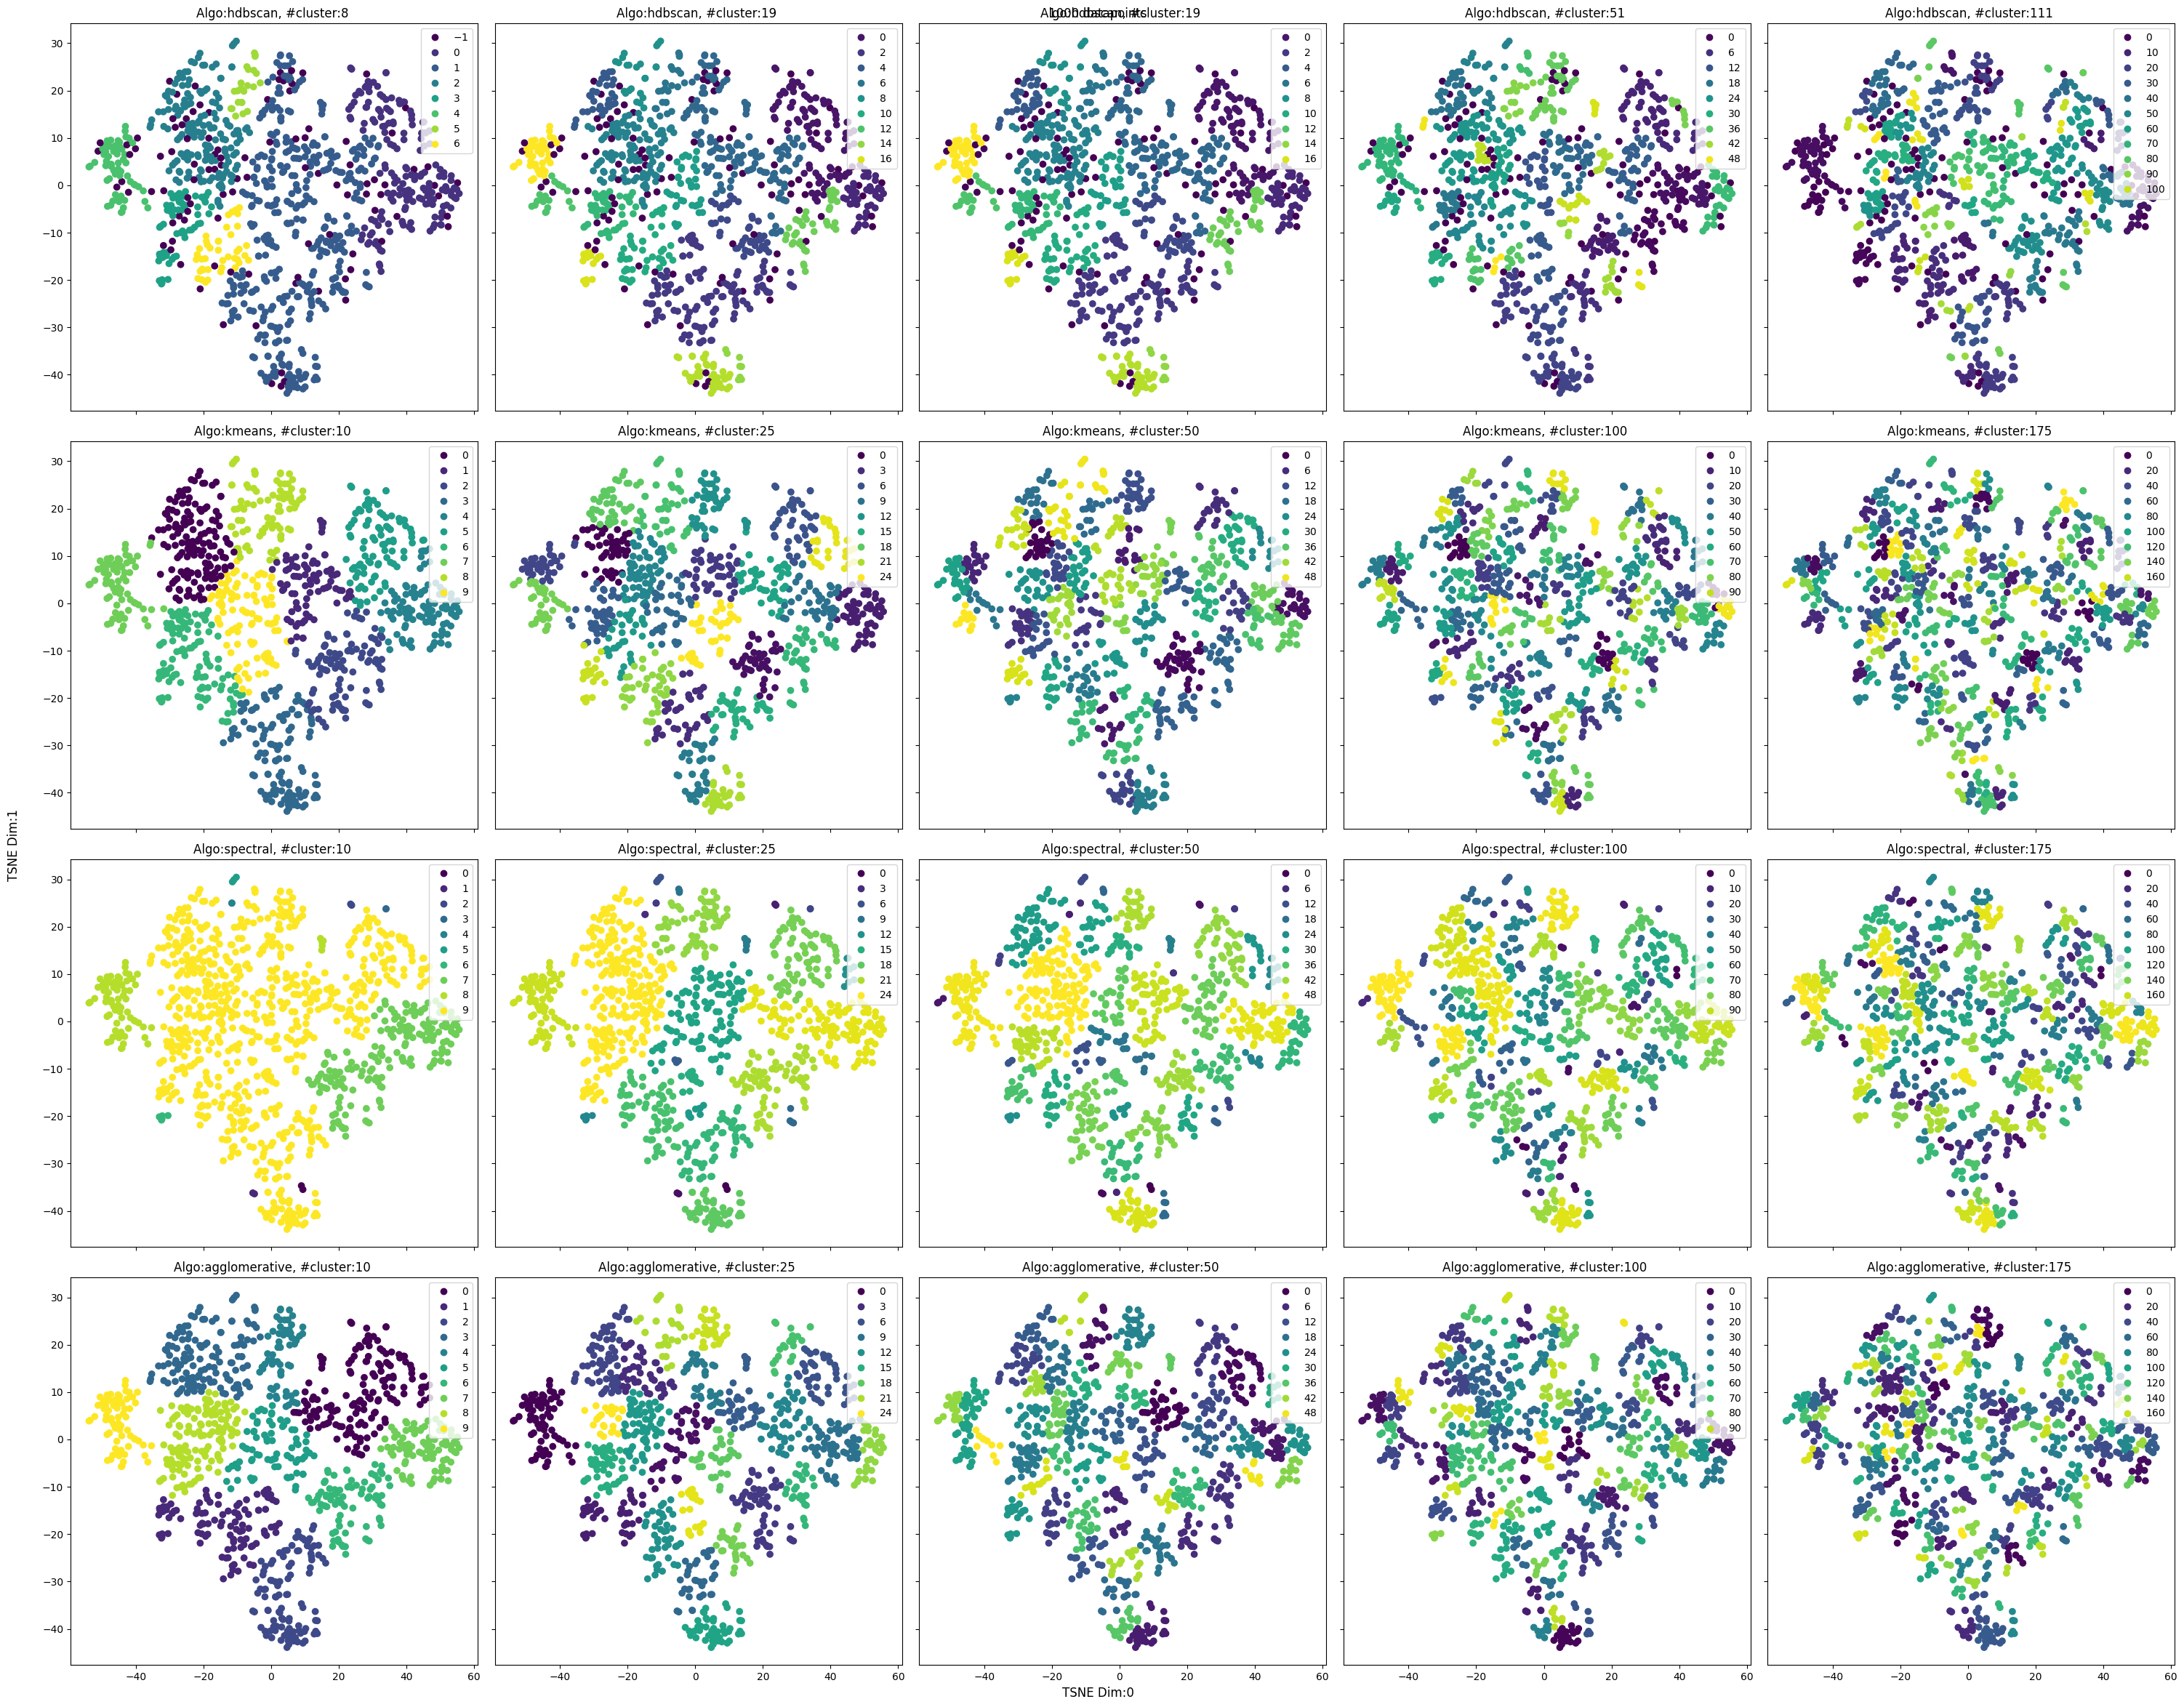

In [11]:
fig, axes = plt.subplots(nrows=4, ncols=5,sharex=True, sharey=True, figsize=(30,24),tight_layout = True)
for ax, param in zip(axes.flatten(),params):
    classifier = param[0]
    n_cluster = param[1]
    if classifier == 'hdbscan':
        rel_points = red_all_points.copy()

        clf, pred, num_clusters = get_clusters(data = rel_points,store_centers = 'medoid', classifier=config['results']['classifier'],min_samples=config['results']['min_samples']) 

        original_clusters = pred.copy()
        cluster_members = []
        clusters = np.unique(original_clusters).tolist()
        for cluster in clusters:
            idx = (original_clusters == cluster).nonzero()[0]
            cluster_points = np.take(red_all_points,idx,axis=0)
            cluster_members.append(cluster_points)

        count=0

        while True:
            rel_points, original_clusters, clusters, cluster_members, num_clusters, clf = get_hier_clusters(clf = clf, all_points=red_all_points,rel_points=rel_points,  original_clusters=original_clusters, clusters = clusters, cluster_members=cluster_members, min_samples=config['results']['min_samples'], classifier='hdbscan',count=count)
            count+=1

            total_num_clusters = len(np.unique(original_clusters).tolist())
            print(f'The total number of clusters are {total_num_clusters}')

            if total_num_clusters<=n_cluster:
                n_cluster=total_num_clusters
                pred = original_clusters.copy()
                break
        print(f'Ultimately unique labels are {len(np.unique(pred).tolist())}')
    else:   
        clf, pred, num_clusters = get_clusters(data = red_all_points,store_centers = 'medoid', classifier=classifier,min_samples=config['results']['min_samples'],n_clusters=n_cluster)
    scatter = ax.scatter(red_all_points[:,0], red_all_points[:,1], c=pred)  
    ax.set_title(f'Algo:{classifier}, #cluster:{n_cluster} ')  
    ax.legend(*scatter.legend_elements(),loc='upper right')
    fig.supxlabel('TSNE Dim:0')
    fig.supylabel('TSNE Dim:1',x=0)
    fig.suptitle(f'{num_points} datapoints')
    fig.subplots_adjust(top=0.70)
plt.savefig(f'cluster_plot_{num_points}.png', bbox_inches='tight')
plt.show()


## 2000 datapoints

In [12]:
num_points = 2000
red_all_points = np.take(all_points, np.random.choice(np.array(list(range(0,all_points.shape[0]))), num_points, replace=False), axis=0, out=None, mode='raise')
    
print(f'Dimension of dataset {red_all_points.shape} and it takes {end-start} seconds or {(end-start)/60} minutes or {(end-start)/3600} hours')
red_all_points = get_pca(n_components=config['pca']['n_components'],data=red_all_points)
    
# red_all_points = get_pca(n_components=config['pca_2']['n_components'],data=red_all_points)

red_all_points = get_tsne(n_components=config['tsne']['n_components'], data=red_all_points)

Dimension of dataset (2000, 1024) and it takes 22.655192852020264 seconds or 0.37758654753367105 minutes or 0.006293109125561185 hours
Dimesnion after PCA (2000, 512) and it takes 2.36933970451355 seconds or 0.03948899507522583 minutes or 0.0006581499179204305 hours
Dimesnion after TSNE (2000, 2) and it takes 5.2732555866241455 seconds or 0.08788759311040242 minutes or 0.0014647932185067071 hours


In [13]:
classifiers = ['hdbscan', 'kmeans', 'spectral', 'agglomerative']
n_clusters = [10, 25, 50, 100, 175]
params = list(itertools.product(classifiers,n_clusters))
# classifiers = ['hdbscan', 'agglomerative', 'kmeans']
# n_clusters = [10, 25, 50, 100, 175]
# params = list(itertools.product(classifiers,n_clusters))
params

[('hdbscan', 10),
 ('hdbscan', 25),
 ('hdbscan', 50),
 ('hdbscan', 100),
 ('hdbscan', 175),
 ('kmeans', 10),
 ('kmeans', 25),
 ('kmeans', 50),
 ('kmeans', 100),
 ('kmeans', 175),
 ('spectral', 10),
 ('spectral', 25),
 ('spectral', 50),
 ('spectral', 100),
 ('spectral', 175),
 ('agglomerative', 10),
 ('agglomerative', 25),
 ('agglomerative', 50),
 ('agglomerative', 100),
 ('agglomerative', 175)]

In [14]:
fig, axes = plt.subplots(nrows=4, ncols=5,sharex=True, sharey=True, figsize=(30,24),tight_layout = True)
for ax, param in zip(axes.flatten(),params):
    classifier = param[0]
    n_cluster = param[1]
    if classifier == 'hdbscan':
        rel_points = red_all_points.copy()

        clf, pred, num_clusters = get_clusters(data = rel_points,store_centers = 'medoid', classifier=config['results']['classifier'],min_samples=config['results']['min_samples']) 

        original_clusters = pred.copy()
        cluster_members = []
        clusters = np.unique(original_clusters).tolist()
        for cluster in clusters:
            idx = (original_clusters == cluster).nonzero()[0]
            cluster_points = np.take(red_all_points,idx,axis=0)
            cluster_members.append(cluster_points)

        count=0

        while True:
            rel_points, original_clusters, clusters, cluster_members, num_clusters, clf = get_hier_clusters(clf = clf, all_points=red_all_points,rel_points=rel_points,  original_clusters=original_clusters, clusters = clusters, cluster_members=cluster_members, min_samples=config['results']['min_samples'], classifier='hdbscan',count=count)
            count+=1

            total_num_clusters = len(np.unique(original_clusters).tolist())
            print(f'The total number of clusters are {total_num_clusters}')

            if total_num_clusters<=n_cluster:
                n_cluster=total_num_clusters
                pred = original_clusters.copy()
                break
        print(f'Ultimately unique labels are {len(np.unique(pred).tolist())}')
    else:   
        clf, pred, num_clusters = get_clusters(data = red_all_points,store_centers = 'medoid', classifier=classifier,min_samples=config['results']['min_samples'],n_clusters=n_cluster)
    scatter = ax.scatter(red_all_points[:,0], red_all_points[:,1], c=pred)  
    ax.set_title(f'Algo:{classifier}, #cluster:{n_cluster} ')  
    ax.legend(*scatter.legend_elements(),loc='upper right')
    fig.supxlabel('TSNE Dim:0')
    fig.supylabel('TSNE Dim:1',x=0)
    fig.suptitle(f'{num_points} datapoints')
    fig.subplots_adjust(top=0.70)
plt.savefig(f'cluster_plot_{num_points}.png', bbox_inches='tight')
plt.show()


hdbscan Clustering
The value of min_cluster_size is 2
Number of outliers 211
Number of clusters excluding outliers 618
Clustering validation dataset took 0.2436692714691162 seconds
(618, 2)


100%|██████████| 618/618 [00:00<00:00, 12798.44it/s]

Dimension of embedding of all representative  objects (618, 2)
The total number of clusters are 619
 Number if points to be clustered are 618
hdbscan Clustering
The value of min_cluster_size is 2
Number of outliers 72
Number of clusters excluding outliers 171
Clustering validation dataset took 0.07687664031982422 seconds
(171, 2)


Now number of clusters are 244
The number are outliers in level 1 are 211


100%|██████████| 171/171 [00:00<00:00, 31071.61it/s]

Dimension of embedding of all representative  objects (171, 2)
Dimension of embedding of all representative  objects including outliers (243, 2)
The total number of clusters are 244
 Number if points to be clustered are 243
hdbscan Clustering
The value of min_cluster_size is 2
Number of outliers 51
Number of clusters excluding outliers 55
Clustering validation dataset took 0.04222822189331055 seconds
(55, 2)


Now number of clusters are 107
The number are outliers in level 2 are 211


100%|██████████| 55/55 [00:00<00:00, 39099.44it/s]


Dimension of embedding of all representative  objects (55, 2)
Dimension of embedding of all representative  objects including outliers (106, 2)
The total number of clusters are 107
 Number if points to be clustered are 106
hdbscan Clustering
The value of min_cluster_size is 2
Number of outliers 15
Number of clusters excluding outliers 29
Clustering validation dataset took 0.04366278648376465 seconds
(29, 2)
Now number of clusters are 45
The number are outliers in level 3 are 211


100%|██████████| 29/29 [00:00<00:00, 34992.75it/s]

Dimension of embedding of all representative  objects (29, 2)
Dimension of embedding of all representative  objects including outliers (44, 2)
The total number of clusters are 45
 Number if points to be clustered are 44
hdbscan Clustering
The value of min_cluster_size is 2
Number of outliers 9
Number of clusters excluding outliers 12
Clustering validation dataset took 0.031216859817504883 seconds
(12, 2)


Now number of clusters are 22
The number are outliers in level 4 are 211


100%|██████████| 12/12 [00:00<00:00, 20962.79it/s]


Dimension of embedding of all representative  objects (12, 2)
Dimension of embedding of all representative  objects including outliers (21, 2)
The total number of clusters are 22
 Number if points to be clustered are 21
hdbscan Clustering
The value of min_cluster_size is 2
Number of outliers 4
Number of clusters excluding outliers 5
Clustering validation dataset took 0.028746843338012695 seconds
(5, 2)
Now number of clusters are 10
The number are outliers in level 5 are 211


100%|██████████| 5/5 [00:00<00:00, 29873.96it/s]

Dimension of embedding of all representative  objects (5, 2)
Dimension of embedding of all representative  objects including outliers (9, 2)
The total number of clusters are 10
Ultimately unique labels are 10
hdbscan Clustering


The value of min_cluster_size is 2
Number of outliers 211
Number of clusters excluding outliers 618
Clustering validation dataset took 0.23799467086791992 seconds
(618, 2)


100%|██████████| 618/618 [00:00<00:00, 12837.86it/s]

Dimension of embedding of all representative  objects (618, 2)
The total number of clusters are 619
 Number if points to be clustered are 618
hdbscan Clustering
The value of min_cluster_size is 2
Number of outliers 72
Number of clusters excluding outliers 171
Clustering validation dataset took 0.07423639297485352 seconds
(171, 2)


Now number of clusters are 244
The number are outliers in level 1 are 211


100%|██████████| 171/171 [00:00<00:00, 21904.04it/s]

Dimension of embedding of all representative  objects (171, 2)
Dimension of embedding of all representative  objects including outliers (243, 2)
The total number of clusters are 244
 Number if points to be clustered are 243
hdbscan Clustering
The value of min_cluster_size is 2
Number of outliers 51
Number of clusters excluding outliers 55
Clustering validation dataset took 0.04266762733459473 seconds
(55, 2)


Now number of clusters are 107
The number are outliers in level 2 are 211


100%|██████████| 55/55 [00:00<00:00, 52776.65it/s]


Dimension of embedding of all representative  objects (55, 2)
Dimension of embedding of all representative  objects including outliers (106, 2)
The total number of clusters are 107
 Number if points to be clustered are 106
hdbscan Clustering
The value of min_cluster_size is 2
Number of outliers 15
Number of clusters excluding outliers 29
Clustering validation dataset took 0.03477001190185547 seconds
(29, 2)
Now number of clusters are 45
The number are outliers in level 3 are 211


100%|██████████| 29/29 [00:00<00:00, 26007.02it/s]

Dimension of embedding of all representative  objects (29, 2)
Dimension of embedding of all representative  objects including outliers (44, 2)
The total number of clusters are 45
 Number if points to be clustered are 44
hdbscan Clustering
The value of min_cluster_size is 2
Number of outliers 9
Number of clusters excluding outliers 12
Clustering validation dataset took 0.027018070220947266 seconds
(12, 2)


Now number of clusters are 22
The number are outliers in level 4 are 211


100%|██████████| 12/12 [00:00<00:00, 47437.93it/s]


Dimension of embedding of all representative  objects (12, 2)
Dimension of embedding of all representative  objects including outliers (21, 2)
The total number of clusters are 22
Ultimately unique labels are 22
hdbscan Clustering
The value of min_cluster_size is 2
Number of outliers 211
Number of clusters excluding outliers 618
Clustering validation dataset took 0.22166967391967773 seconds
(618, 2)


100%|██████████| 618/618 [00:00<00:00, 13872.37it/s]

Dimension of embedding of all representative  objects (618, 2)
The total number of clusters are 619
 Number if points to be clustered are 618
hdbscan Clustering
The value of min_cluster_size is 2
Number of outliers 72
Number of clusters excluding outliers 171
Clustering validation dataset took 0.07628321647644043 seconds
(171, 2)


Now number of clusters are 244
The number are outliers in level 1 are 211


100%|██████████| 171/171 [00:00<00:00, 26679.54it/s]

Dimension of embedding of all representative  objects (171, 2)
Dimension of embedding of all representative  objects including outliers (243, 2)
The total number of clusters are 244
 Number if points to be clustered are 243
hdbscan Clustering
The value of min_cluster_size is 2
Number of outliers 51
Number of clusters excluding outliers 55
Clustering validation dataset took 0.05646967887878418 seconds
(55, 2)


Now number of clusters are 107
The number are outliers in level 2 are 211


100%|██████████| 55/55 [00:00<00:00, 52381.18it/s]


Dimension of embedding of all representative  objects (55, 2)
Dimension of embedding of all representative  objects including outliers (106, 2)
The total number of clusters are 107
 Number if points to be clustered are 106
hdbscan Clustering
The value of min_cluster_size is 2
Number of outliers 15
Number of clusters excluding outliers 29
Clustering validation dataset took 0.036103010177612305 seconds
(29, 2)
Now number of clusters are 45
The number are outliers in level 3 are 211


100%|██████████| 29/29 [00:00<00:00, 38910.69it/s]

Dimension of embedding of all representative  objects (29, 2)
Dimension of embedding of all representative  objects including outliers (44, 2)
The total number of clusters are 45
Ultimately unique labels are 45
hdbscan Clustering


The value of min_cluster_size is 2
Number of outliers 211
Number of clusters excluding outliers 618
Clustering validation dataset took 0.23992323875427246 seconds
(618, 2)


100%|██████████| 618/618 [00:00<00:00, 11680.24it/s]

Dimension of embedding of all representative  objects (618, 2)
The total number of clusters are 619
 Number if points to be clustered are 618
hdbscan Clustering
The value of min_cluster_size is 2
Number of outliers 72
Number of clusters excluding outliers 171
Clustering validation dataset took 0.0723879337310791 seconds
(171, 2)


Now number of clusters are 244
The number are outliers in level 1 are 211


100%|██████████| 171/171 [00:00<00:00, 25375.06it/s]

Dimension of embedding of all representative  objects (171, 2)
Dimension of embedding of all representative  objects including outliers (243, 2)
The total number of clusters are 244
 Number if points to be clustered are 243
hdbscan Clustering
The value of min_cluster_size is 2
Number of outliers 51
Number of clusters excluding outliers 55
Clustering validation dataset took 0.04224896430969238 seconds
(55, 2)


Now number of clusters are 107
The number are outliers in level 2 are 211


100%|██████████| 55/55 [00:00<00:00, 19561.33it/s]


Dimension of embedding of all representative  objects (55, 2)
Dimension of embedding of all representative  objects including outliers (106, 2)
The total number of clusters are 107
 Number if points to be clustered are 106
hdbscan Clustering
The value of min_cluster_size is 2
Number of outliers 15
Number of clusters excluding outliers 29
Clustering validation dataset took 0.0348668098449707 seconds
(29, 2)
Now number of clusters are 45
The number are outliers in level 3 are 211


100%|██████████| 29/29 [00:00<00:00, 60155.70it/s]

Dimension of embedding of all representative  objects (29, 2)
Dimension of embedding of all representative  objects including outliers (44, 2)
The total number of clusters are 45
Ultimately unique labels are 45
hdbscan Clustering


The value of min_cluster_size is 2
Number of outliers 211
Number of clusters excluding outliers 618
Clustering validation dataset took 0.23903346061706543 seconds
(618, 2)


100%|██████████| 618/618 [00:00<00:00, 11335.66it/s]

Dimension of embedding of all representative  objects (618, 2)
The total number of clusters are 619
 Number if points to be clustered are 618
hdbscan Clustering
The value of min_cluster_size is 2
Number of outliers 72
Number of clusters excluding outliers 171
Clustering validation dataset took 0.07355213165283203 seconds
(171, 2)


Now number of clusters are 244
The number are outliers in level 1 are 211


100%|██████████| 171/171 [00:00<00:00, 25486.87it/s]

Dimension of embedding of all representative  objects (171, 2)
Dimension of embedding of all representative  objects including outliers (243, 2)
The total number of clusters are 244
 Number if points to be clustered are 243
hdbscan Clustering
The value of min_cluster_size is 2
Number of outliers 51
Number of clusters excluding outliers 55
Clustering validation dataset took 0.04137921333312988 seconds
(55, 2)


Now number of clusters are 107
The number are outliers in level 2 are 211


100%|██████████| 55/55 [00:00<00:00, 51711.89it/s]

Dimension of embedding of all representative  objects (55, 2)
Dimension of embedding of all representative  objects including outliers (106, 2)
The total number of clusters are 107
Ultimately unique labels are 107
kmeans Clustering
Number of clusters excluding outliers 10
Clustering validation dataset took 0.025424957275390625 seconds
kmeans Clustering
Number of clusters excluding outliers 25
Clustering validation dataset took 0.04197382926940918 seconds
kmeans Clustering
Number of clusters excluding outliers 50
Clustering validation dataset took 0.05028033256530762 seconds


kmeans Clustering
Number of clusters excluding outliers 100
Clustering validation dataset took 0.08905267715454102 seconds
kmeans Clustering
Number of clusters excluding outliers 175
Clustering validation dataset took 0.13790583610534668 seconds
spectral Clustering


## 5000 Datapoints


In [ ]:
num_points = 5000
red_all_points = np.take(all_points, np.random.choice(np.array(list(range(0,all_points.shape[0]))), num_points, replace=False), axis=0, out=None, mode='raise')
    
print(f'Dimension of dataset {red_all_points.shape} and it takes {end-start} seconds or {(end-start)/60} minutes or {(end-start)/3600} hours')
red_all_points = get_pca(n_components=config['pca']['n_components'],data=red_all_points)
    
# red_all_points = get_pca(n_components=config['pca_2']['n_components'],data=red_all_points)

red_all_points = get_tsne(n_components=config['tsne']['n_components'], data=red_all_points)

In [ ]:
# classifiers = ['hdbscan', 'kmeans', 'spectral', 'agglomerative']
# n_clusters = [10, 25, 50, 100, 175]
# params = list(itertools.product(classifiers,n_clusters))
classifiers = ['hdbscan', 'agglomerative', 'kmeans']
n_clusters = [10, 25, 50, 100, 175]
params = list(itertools.product(classifiers,n_clusters))
params

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=5,sharex=True, sharey=True, figsize=(60,36),tight_layout = True)
for ax, param in zip(axes.flatten(),params):
    classifier = param[0]
    n_cluster = param[1]
    if classifier == 'hdbscan':
        rel_points = red_all_points.copy()

        clf, pred, num_clusters = get_clusters(data = rel_points,store_centers = 'medoid', classifier=config['results']['classifier'],min_samples=config['results']['min_samples']) 

        original_clusters = pred.copy()
        cluster_members = []
        clusters = np.unique(original_clusters).tolist()
        for cluster in clusters:
            idx = (original_clusters == cluster).nonzero()[0]
            cluster_points = np.take(red_all_points,idx,axis=0)
            cluster_members.append(cluster_points)

        count=0

        while True:
            rel_points, original_clusters, clusters, cluster_members, num_clusters, clf = get_hier_clusters(clf = clf, all_points=red_all_points,rel_points=rel_points,  original_clusters=original_clusters, clusters = clusters, cluster_members=cluster_members, min_samples=config['results']['min_samples'], classifier='hdbscan',count=count)
            count+=1

            total_num_clusters = len(np.unique(original_clusters).tolist())
            print(f'The total number of clusters are {total_num_clusters}')

            if total_num_clusters<=n_cluster:
                n_cluster=total_num_clusters
                pred = original_clusters.copy()
                break
        print(f'Ultimately unique labels are {len(np.unique(pred).tolist())}')
    else:   
        clf, pred, num_clusters = get_clusters(data = red_all_points,store_centers = 'medoid', classifier=classifier,min_samples=config['results']['min_samples'],n_clusters=n_cluster)
    scatter = ax.scatter(red_all_points[:,0], red_all_points[:,1], c=pred)  
    ax.set_title(f'Algo:{classifier}, #cluster:{n_cluster} ')  
    ax.legend(*scatter.legend_elements(),loc='upper right')
    fig.supxlabel('TSNE Dim:0')
    fig.supylabel('TSNE Dim:1',x=0)
    fig.suptitle(f'{num_points} datapoints')
    fig.subplots_adjust(top=0.70)
plt.savefig(f'cluster_plot_{num_points}.png', bbox_inches='tight')
plt.show()

## 10K datapoints

In [ ]:
num_points = 10000
red_all_points = np.take(all_points, np.random.choice(np.array(list(range(0,all_points.shape[0]))), num_points, replace=False), axis=0, out=None, mode='raise')
    
print(f'Dimension of dataset {red_all_points.shape} and it takes {end-start} seconds or {(end-start)/60} minutes or {(end-start)/3600} hours')
red_all_points = get_pca(n_components=config['pca']['n_components'],data=red_all_points)
    
# red_all_points = get_pca(n_components=config['pca_2']['n_components'],data=red_all_points)

red_all_points = get_tsne(n_components=config['tsne']['n_components'], data=red_all_points)

In [ ]:
# classifiers = ['hdbscan', 'kmeans', 'spectral', 'agglomerative']
# n_clusters = [10, 25, 50, 100, 175]
# params = list(itertools.product(classifiers,n_clusters))
classifiers = ['hdbscan', 'agglomerative', 'kmeans']
n_clusters = [10, 25, 50, 100, 175]
params = list(itertools.product(classifiers,n_clusters))
params

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=5,sharex=True, sharey=True, figsize=(60,36),tight_layout = True)
for ax, param in zip(axes.flatten(),params):
    classifier = param[0]
    n_cluster = param[1]
    if classifier == 'hdbscan':
        rel_points = red_all_points.copy()

        clf, pred, num_clusters = get_clusters(data = rel_points,store_centers = 'medoid', classifier=config['results']['classifier'],min_samples=config['results']['min_samples']) 

        original_clusters = pred.copy()
        cluster_members = []
        clusters = np.unique(original_clusters).tolist()
        for cluster in clusters:
            idx = (original_clusters == cluster).nonzero()[0]
            cluster_points = np.take(red_all_points,idx,axis=0)
            cluster_members.append(cluster_points)

        count=0

        while True:
            rel_points, original_clusters, clusters, cluster_members, num_clusters, clf = get_hier_clusters(clf = clf, all_points=red_all_points,rel_points=rel_points,  original_clusters=original_clusters, clusters = clusters, cluster_members=cluster_members, min_samples=config['results']['min_samples'], classifier='hdbscan',count=count)
            count+=1

            total_num_clusters = len(np.unique(original_clusters).tolist())
            print(f'The total number of clusters are {total_num_clusters}')

            if total_num_clusters<=n_cluster:
                n_cluster=total_num_clusters
                pred = original_clusters.copy()
                break
        print(f'Ultimately unique labels are {len(np.unique(pred).tolist())}')
    else:   
        clf, pred, num_clusters = get_clusters(data = red_all_points,store_centers = 'medoid', classifier=classifier,min_samples=config['results']['min_samples'],n_clusters=n_cluster)
    scatter = ax.scatter(red_all_points[:,0], red_all_points[:,1], c=pred)  
    ax.set_title(f'Algo:{classifier}, #cluster:{n_cluster} ')  
    ax.legend(*scatter.legend_elements(),loc='upper right')
    fig.supxlabel('TSNE Dim:0')
    fig.supylabel('TSNE Dim:1',x=0)
    fig.suptitle(f'{num_points} datapoints')
    fig.subplots_adjust(top=0.70)
plt.savefig(f'cluster_plot_{num_points}.png', bbox_inches='tight')
plt.show()

## 50K Datapoints

In [ ]:
num_points = min(50000,len(all_points))
red_all_points = np.take(all_points, np.random.choice(np.array(list(range(0,all_points.shape[0]))), num_points, replace=False), axis=0, out=None, mode='raise')
    
print(f'Dimension of dataset {red_all_points.shape} and it takes {end-start} seconds or {(end-start)/60} minutes or {(end-start)/3600} hours')
red_all_points = get_pca(n_components=config['pca']['n_components'],data=red_all_points)
    
# red_all_points = get_pca(n_components=config['pca_2']['n_components'],data=red_all_points)

red_all_points = get_tsne(n_components=config['tsne']['n_components'], data=red_all_points)

In [ ]:
# classifiers = ['hdbscan', 'kmeans', 'spectral', 'agglomerative']
# n_clusters = [10, 25, 50, 100, 175]
# params = list(itertools.product(classifiers,n_clusters))
classifiers = ['hdbscan', 'agglomerative', 'kmeans']
n_clusters = [10, 25, 50, 100, 175]
params = list(itertools.product(classifiers,n_clusters))

In [29]:
fig, axes = plt.subplots(nrows=3, ncols=5,sharex=True, sharey=True, figsize=(60,36),tight_layout = True)
for ax, param in zip(axes.flatten(),params):
    classifier = param[0]
    n_cluster = param[1]
    if classifier == 'hdbscan':
        rel_points = red_all_points.copy()

        clf, pred, num_clusters = get_clusters(data = rel_points,store_centers = 'medoid', classifier=config['results']['classifier'],min_samples=config['results']['min_samples']) 

        original_clusters = pred.copy()
        cluster_members = []
        clusters = np.unique(original_clusters).tolist()
        for cluster in clusters:
            idx = (original_clusters == cluster).nonzero()[0]
            cluster_points = np.take(red_all_points,idx,axis=0)
            cluster_members.append(cluster_points)

        count=0

        while True:
            rel_points, original_clusters, clusters, cluster_members, num_clusters, clf = get_hier_clusters(clf = clf, all_points=red_all_points,rel_points=rel_points,  original_clusters=original_clusters, clusters = clusters, cluster_members=cluster_members, min_samples=config['results']['min_samples'], classifier='hdbscan',count=count)
            count+=1

            total_num_clusters = len(np.unique(original_clusters).tolist())
            print(f'The total number of clusters are {total_num_clusters}')

            if total_num_clusters<=n_cluster:
                n_cluster=total_num_clusters
                pred = original_clusters.copy()
                break
        print(f'Ultimately unique labels are {len(np.unique(pred).tolist())}')
    else:   
        clf, pred, num_clusters = get_clusters(data = red_all_points,store_centers = 'medoid', classifier=classifier,min_samples=config['results']['min_samples'],n_clusters=n_cluster)
    scatter = ax.scatter(red_all_points[:,0], red_all_points[:,1], c=pred)  
    ax.set_title(f'Algo:{classifier}, #cluster:{n_cluster} ')  
    ax.legend(*scatter.legend_elements(),loc='upper right')
    fig.supxlabel('TSNE Dim:0')
    fig.supylabel('TSNE Dim:1',x=0)
    fig.suptitle(f'{num_points} datapoints')
    fig.subplots_adjust(top=0.70)
plt.savefig(f'cluster_plot_{num_points}.png', bbox_inches='tight')
plt.show()

## debug

In [5]:
n_cluster = 10
rel_points = red_all_points.copy()

clf, pred, num_clusters = get_clusters(data = rel_points,store_centers = 'medoid', classifier='hdbscan',min_samples=config['results']['min_samples']) 


original_clusters = pred.copy()
cluster_members = []
clusters = np.unique(original_clusters).tolist()
for cluster in clusters:
    idx = (original_clusters == cluster).nonzero()[0]
    cluster_points = np.take(red_all_points,idx,axis=0)
    cluster_members.append(cluster_points)

count=0

while True:
    rel_points, original_clusters, clusters, cluster_members, num_clusters, clf = get_hier_clusters(clf = clf, all_points=red_all_points,rel_points=rel_points,  original_clusters=original_clusters, clusters = clusters, cluster_members=cluster_members, min_samples=config['results']['min_samples'], classifier='hdbscan',count=count)
    count+=1

    total_num_clusters = len(np.unique(original_clusters).tolist())

    if num_clusters<=n_cluster:
        n_cluster=num_clusters
        pred = original_clusters.copy()
        break
print(f'Ultimately unique labels are {len(np.unique(pred).tolist())}')

hdbscan Clustering
The value of min_cluster_size is 2
Number of outliers 94
Number of clusters excluding outliers 300
Clustering validation dataset took 0.12325739860534668 seconds
(300, 2)


100%|██████████| 300/300 [00:00<00:00, 21823.36it/s]

Dimension of embedding of all representative  objects (300, 2)
 Number if points to be clustered are 300
hdbscan Clustering
The value of min_cluster_size is 2


Number of outliers 51
Number of clusters excluding outliers 81
Clustering validation dataset took 0.05893969535827637 seconds
(81, 2)
Now number of clusters are 133
The number are outliers in level 1 are 94


100%|██████████| 81/81 [00:00<00:00, 15143.24it/s]


Dimension of embedding of all representative  objects (81, 2)
Dimension of embedding of all representative  objects including outliers (132, 2)
 Number if points to be clustered are 132
hdbscan Clustering
The value of min_cluster_size is 2
Number of outliers 21
Number of clusters excluding outliers 31
Clustering validation dataset took 0.038115739822387695 seconds
(31, 2)
Now number of clusters are 53
The number are outliers in level 2 are 94


100%|██████████| 31/31 [00:00<00:00, 36781.73it/s]


Dimension of embedding of all representative  objects (31, 2)
Dimension of embedding of all representative  objects including outliers (52, 2)
 Number if points to be clustered are 52
hdbscan Clustering
The value of min_cluster_size is 2
Number of outliers 16
Number of clusters excluding outliers 11
Clustering validation dataset took 0.029197216033935547 seconds
(11, 2)
Now number of clusters are 28
The number are outliers in level 3 are 94


100%|██████████| 11/11 [00:00<00:00, 28427.20it/s]

Dimension of embedding of all representative  objects (11, 2)
Dimension of embedding of all representative  objects including outliers (27, 2)
 Number if points to be clustered are 27
hdbscan Clustering


The value of min_cluster_size is 2
Number of outliers 4
Number of clusters excluding outliers 4
Clustering validation dataset took 0.025290727615356445 seconds
(4, 2)
Now number of clusters are 9
The number are outliers in level 4 are 94


100%|██████████| 4/4 [00:00<00:00, 17772.47it/s]

Dimension of embedding of all representative  objects (4, 2)
Dimension of embedding of all representative  objects including outliers (8, 2)
Ultimately unique labels are 9
